In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import mean_squared_error #, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from patsy import dmatrix
import statsmodels.api as sm
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# This is loading a csv which is a result of merging three csv files with car horn, gunshot and jackhammer MFCC data.
df = pd.read_csv('all.csv')

## 1. Exploratory Data Analysis

The mel frequency cepstral coefficients (MFCCs) of an audio signal are a small set of features (usually about 10–20) which describe the overall shape of the spectral envelope. MFCCs were frequently used for voice recognition before the task started to be performed using deep learning.

### for each sound: 13 means (media) and 13 standard deviations (desvio) <br>

In [2]:
df_car_horn = pd.read_csv('car_horn.csv')
df_car_horn.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,4.677986,-1.966398,1.688301,-3.354441,1.043490,-1.798730,-0.767414,-1.614851,-0.185658,-0.029143,...,1.890468,1.410196,0.803002,1.311613,0.601646,0.769883,0.416295,0.564592,0.349746,car_horn
1,4.677564,-2.953498,1.426739,-2.261733,0.930528,-2.665626,-0.332971,-0.714048,0.139587,-0.898208,...,1.472251,2.427163,0.554742,0.577265,0.766374,0.758806,0.532139,0.454760,0.376218,car_horn
2,3.872289,-3.173699,1.931834,-1.202015,0.610031,-2.204595,-0.295343,-0.319409,-0.161939,-1.040936,...,1.159666,2.092606,0.540943,0.634752,0.439129,1.018796,0.385876,0.508423,0.394474,car_horn
3,5.160424,-3.750595,2.151555,-1.886166,1.334776,-2.151562,-0.546990,-0.359816,0.054898,-1.013008,...,1.627613,2.086991,0.654731,0.591023,0.497059,0.950790,0.567042,0.393286,0.332839,car_horn
4,2.252624,-3.644894,1.939464,-1.974539,1.823046,-1.844794,-1.132419,-0.942162,0.582952,-0.769522,...,2.167108,1.868980,1.226150,1.161215,1.018720,0.892772,0.453530,0.655595,0.546549,car_horn


In [3]:
df_gun_shot = pd.read_csv('gun_shot.csv')
df_gun_shot.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,4.449007,2.173600,1.963161,-0.800557,0.178743,-0.728219,0.056505,-0.153838,0.567214,0.201561,...,0.723145,1.194441,0.697653,0.721734,0.560400,0.404300,0.472416,0.374041,0.349731,gun_shot
1,2.043331,-3.466958,1.240037,-0.680713,-0.164658,0.443414,0.631894,0.618216,0.832216,0.501840,...,0.656040,0.777169,0.741097,0.721470,0.825443,0.613327,0.386296,0.482972,0.376002,gun_shot
2,2.865998,-1.045675,0.246689,-0.013968,0.201635,0.026856,0.322083,0.178828,0.403881,0.396473,...,0.376575,0.692885,0.448836,0.573831,0.383247,0.512324,0.459133,0.425246,0.338114,gun_shot
3,9.049675,-2.987121,0.171258,0.239190,0.235888,0.938482,-0.606733,1.254823,-0.177860,0.682144,...,0.676923,0.802127,1.339086,1.000085,0.932218,0.448651,0.449794,0.401205,0.306986,gun_shot
4,7.228250,-1.740485,-1.880280,-2.493365,-0.857844,-1.281736,-0.243331,-0.153924,-0.061543,0.239689,...,0.943118,0.963263,0.655275,0.511677,0.528881,0.781521,0.517224,0.522459,0.348899,gun_shot


In [4]:
df_jack_hammer = pd.read_csv('jackhammer.csv')
df_jack_hammer.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,3.157224,-2.588173,2.273089,-0.796466,-0.028995,-0.497596,0.559515,-0.428562,0.280619,0.091826,...,0.421253,0.615541,0.691350,0.574563,0.456013,0.361385,0.377400,0.467928,0.301228,jackhammer
1,2.844840,-2.493685,2.367648,-0.661899,0.153931,-0.469344,0.688136,-0.239434,0.458010,0.244285,...,0.452578,0.602577,0.787569,0.442637,0.578334,0.420711,0.400591,0.467803,0.271247,jackhammer
2,2.923076,-2.634555,2.252746,-0.642217,0.229367,-0.305306,0.820908,-0.117375,0.484489,0.354665,...,0.488221,0.461018,0.949303,0.356565,0.653097,0.527662,0.444311,0.427088,0.307587,jackhammer
3,2.991795,-2.196787,2.418667,-0.771121,0.130831,-0.548720,0.614266,-0.322620,0.229132,0.211164,...,0.518934,0.533276,0.924188,0.389708,0.575989,0.570246,0.617706,0.348473,0.322581,jackhammer
4,3.015562,-2.212751,2.604542,-0.704948,0.039528,-0.640212,0.553211,-0.419303,0.212272,0.291113,...,0.412683,0.625627,0.788604,0.484769,0.487419,0.547162,0.419702,0.350067,0.319744,jackhammer


## Descriptive Statistics
**Let’s start with the descriptive statistics to get an overview of the numerical columns in the dataset.**

In [5]:
# Generate descriptive statistics of the numerical columns
df_car_horn.describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,...,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,5.445349,-3.154202,0.131163,-0.581063,0.449185,-0.817764,-0.062188,0.326184,0.022531,-0.269154,...,1.465596,1.078786,1.314412,0.931259,0.902290,0.706637,0.814776,0.696559,0.657940,0.373907
std,2.944318,1.860527,1.720711,1.347678,0.836452,1.002593,0.735666,0.646041,0.553333,0.594440,...,0.767288,0.548555,0.764178,0.504431,0.417616,0.310860,0.467184,0.389198,0.316915,0.083663
min,-4.672307,-7.737652,-5.472591,-4.068377,-3.315314,-3.794095,-2.701501,-1.660782,-2.150302,-2.626062,...,0.334159,0.295266,0.265892,0.280354,0.293671,0.136682,0.267503,0.190234,0.176745,0.163466
25%,4.234683,-4.370442,-0.881811,-1.446888,-0.044886,-1.678322,-0.472491,-0.108108,-0.307892,-0.507257,...,0.863482,0.693329,0.748558,0.579879,0.595807,0.479948,0.520016,0.440396,0.424798,0.332790
50%,5.815766,-3.306424,0.451429,-0.687657,0.441014,-0.786906,0.036480,0.289043,-0.017096,-0.157769,...,1.283465,0.918425,1.071414,0.776870,0.780050,0.602151,0.663614,0.559367,0.588226,0.373142
75%,7.318514,-1.966398,1.314393,0.146875,1.015455,-0.134321,0.453191,0.790232,0.349098,0.115871,...,1.944860,1.342533,1.778373,1.121677,1.162462,0.851334,0.952535,0.810372,0.798499,0.409466
max,10.602967,2.570022,3.608900,2.914812,3.105604,1.940623,1.556332,2.096199,2.274243,1.145965,...,4.357339,3.538071,4.920654,3.605649,2.860202,1.935464,2.905896,2.263505,2.240934,1.069302


**Data types & missing values**

Next, we should check the data types of each column and see if there are any missing values. As we can see, we have no missing values and all the values are numeric, so there is no need to clean the data.

In [6]:
# Check data types and missing values
df_car_horn_info = pd.DataFrame({
    'Data Type': df_car_horn.dtypes,
    'Missing Values': df_car_horn.isnull().sum(),
    'Unique Values': df_car_horn.nunique()
})

df_car_horn_info

,Data Type,Missing Values,Unique Values
media0,float64,0,429
media1,float64,0,429
media2,float64,0,429
media3,float64,0,429
media4,float64,0,429
media5,float64,0,429
media6,float64,0,429
media7,float64,0,429
media8,float64,0,429
media9,float64,0,429


### For merged classes

In [76]:
df.describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,...,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,3.495076,-2.184187,1.073255,-0.698825,0.455421,-0.364949,0.287642,0.002218,0.228245,-0.124225,...,1.210243,1.095423,0.908105,0.852591,0.728579,0.674253,0.647240,0.578561,0.553523,0.356440
std,3.605594,1.792660,1.425874,0.954231,0.904173,0.801812,0.731956,0.645442,0.515347,0.523789,...,0.628151,0.552409,0.544199,0.438909,0.346493,0.289774,0.300969,0.251892,0.239224,0.066549
min,-4.672307,-9.984891,-5.472591,-4.068377,-4.362307,-3.794095,-2.701501,-1.856276,-2.150302,-2.626062,...,0.334159,0.295266,0.265892,0.280354,0.280959,0.136682,0.267503,0.190234,0.176745,0.163466
25%,0.401549,-3.338016,0.517790,-1.269979,-0.105763,-0.866011,-0.110261,-0.397775,-0.132682,-0.408994,...,0.745493,0.625401,0.545898,0.536299,0.489104,0.460650,0.462194,0.412720,0.388282,0.315536
50%,3.897727,-2.127124,1.070444,-0.717425,0.528501,-0.334075,0.367085,-0.010347,0.248138,-0.135857,...,1.072896,1.024874,0.753169,0.738506,0.622663,0.590892,0.570859,0.515397,0.484400,0.343735
75%,6.220131,-1.201787,1.952195,-0.131011,1.133396,0.188993,0.767006,0.394905,0.589735,0.170755,...,1.517922,1.464322,1.073476,1.030323,0.855334,0.806172,0.745861,0.666146,0.635796,0.380651
max,10.602967,2.943808,4.826087,2.914812,3.156123,2.050018,2.381640,2.096199,2.274243,1.788323,...,4.357339,3.719680,4.920654,3.605649,2.860202,1.935464,2.905896,2.263505,2.240934,1.069302


In [10]:
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

df_info

,Data Type,Missing Values,Unique Values
media0,float64,0,1803
media1,float64,0,1803
media2,float64,0,1803
media3,float64,0,1801
media4,float64,0,1803
media5,float64,0,1801
media6,float64,0,1803
media7,float64,0,1802
media8,float64,0,1801
media9,float64,0,1802


## Univariate Analysis (Distribution of individual features)


I don't really know what insights to draw from these graphs.

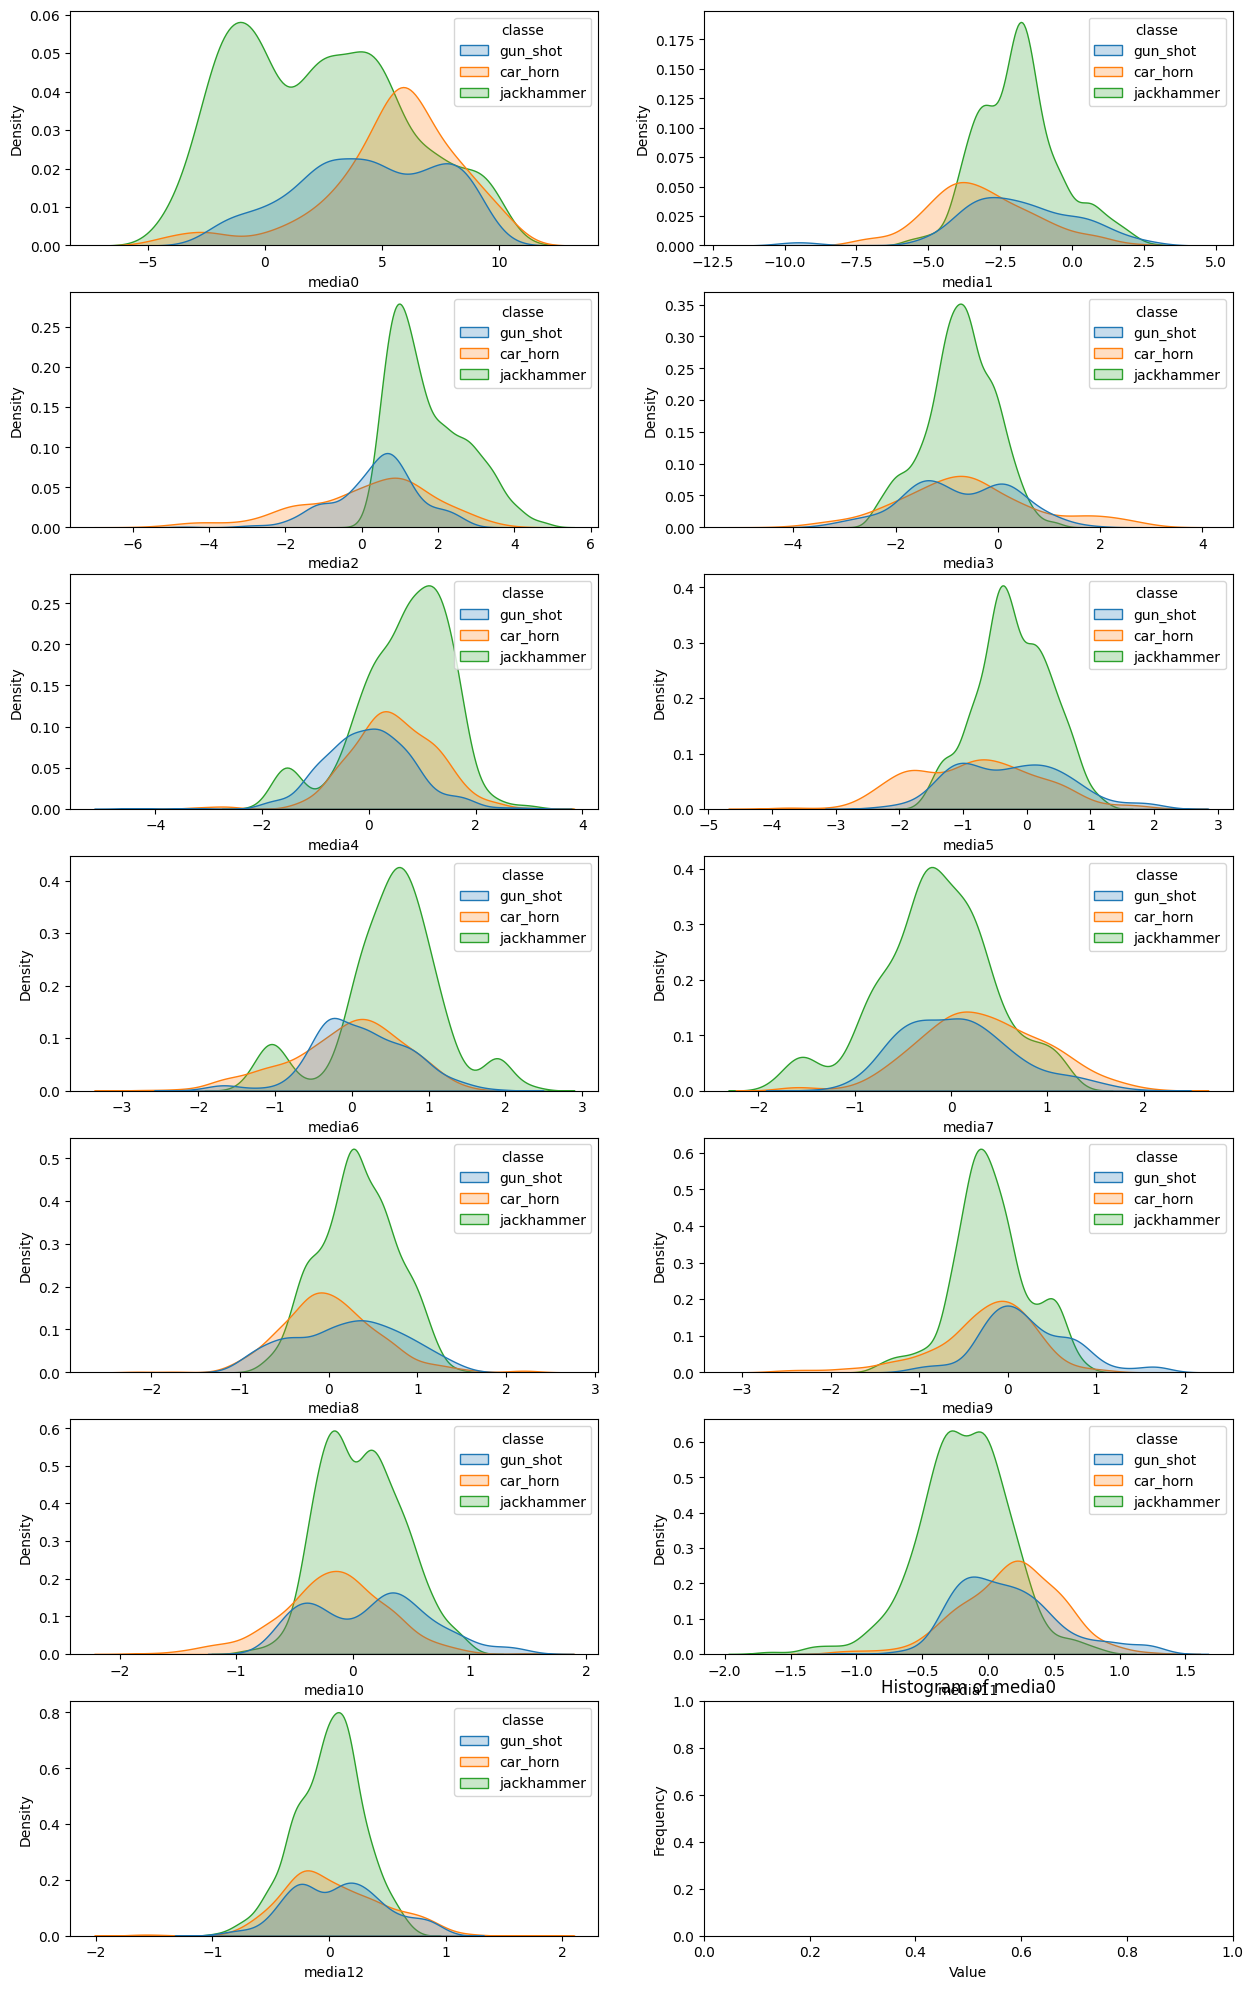

In [70]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.kdeplot(data=df, x='media' + str(i*2), hue='classe', shade=True, color='blue', ax=axes[i][0])
    if (i == 6):
        continue
    sns.kdeplot(data=df, x='media' + str(i*2 + 1), hue='classe', shade=True, color='blue', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

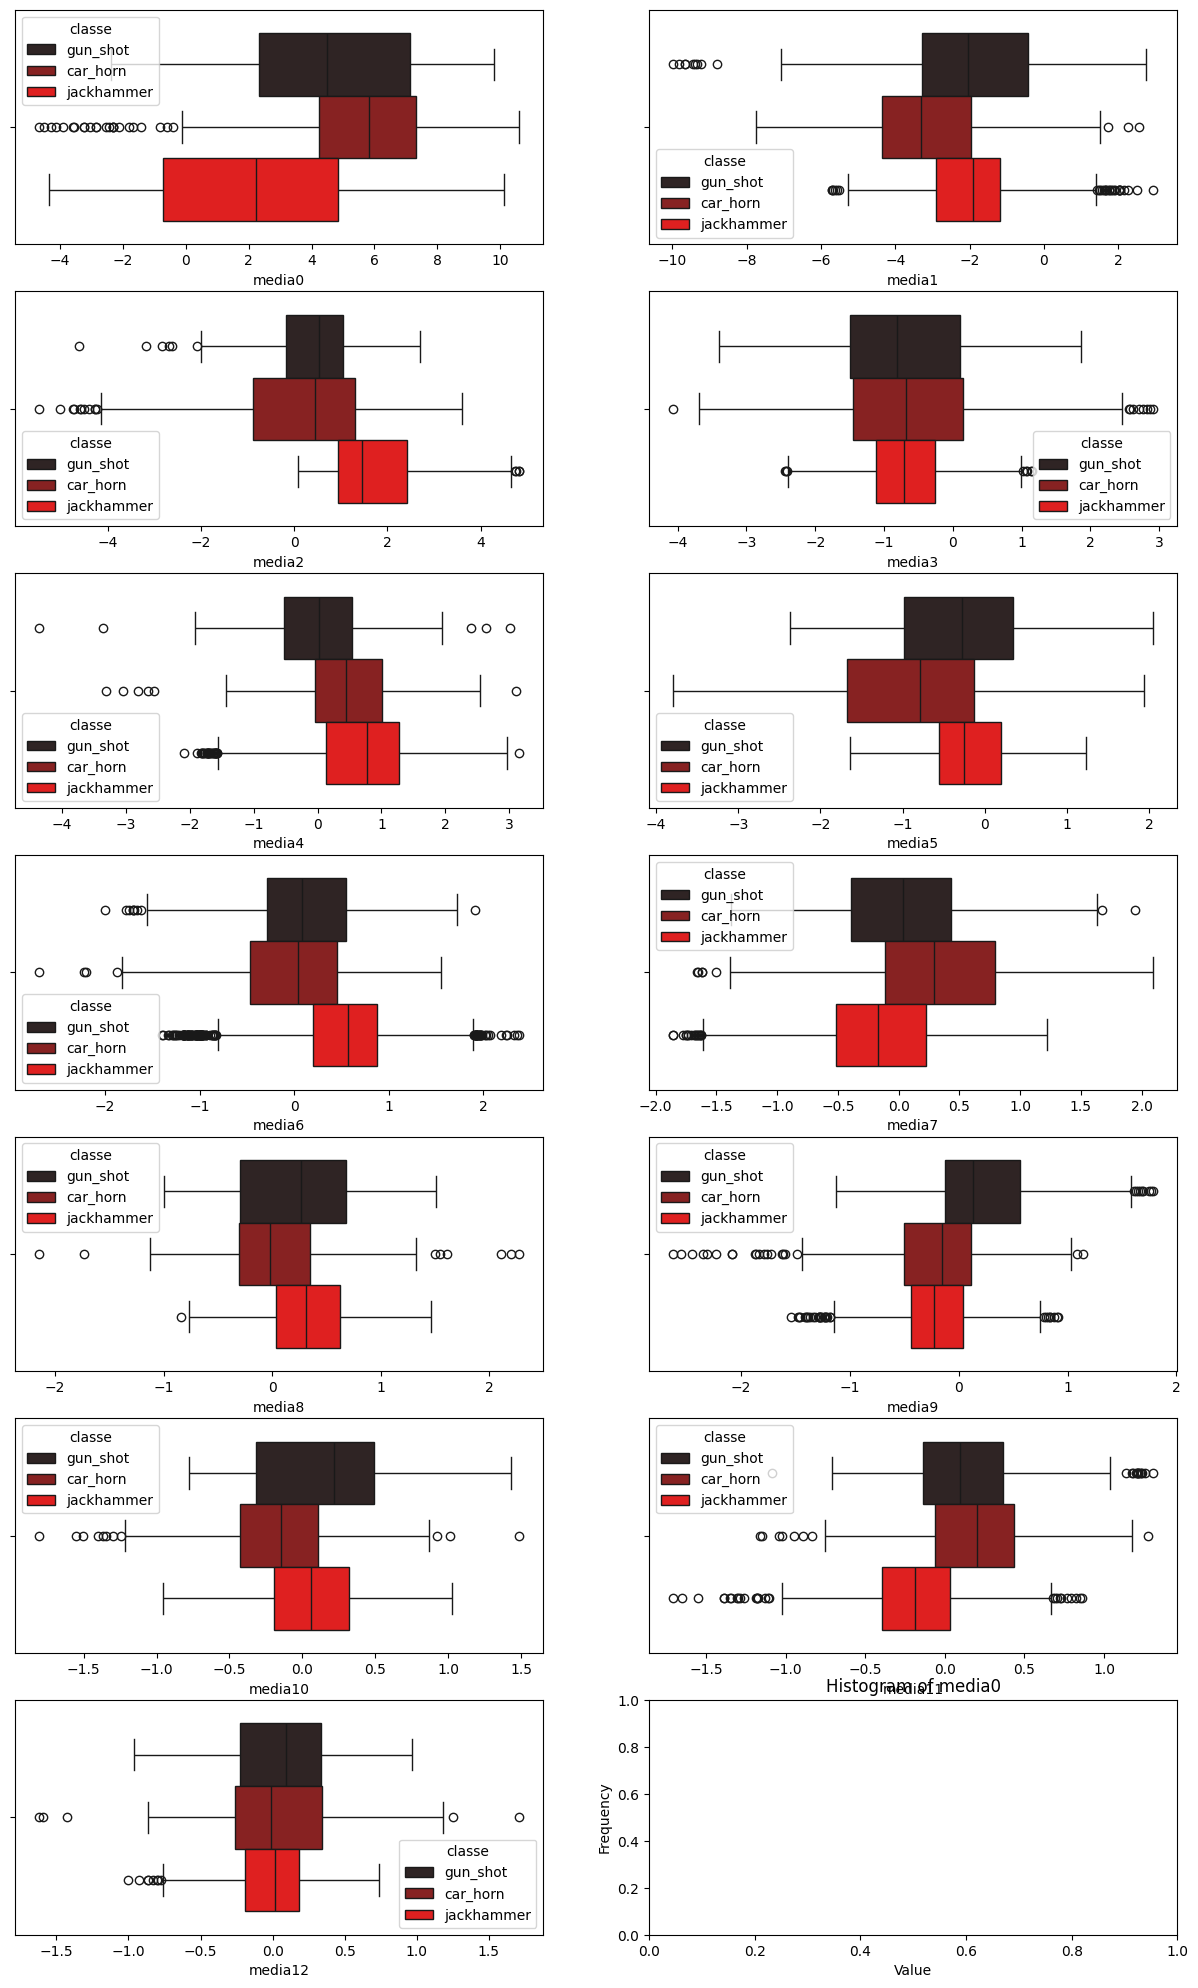

In [66]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.boxplot(data=df, x='media' + str(i*2), hue='classe', color='red', ax=axes[i][0])
    if (i == 6):
        continue
    sns.boxplot(data=df, x='media' + str(i*2 + 1), hue='classe', color='red', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

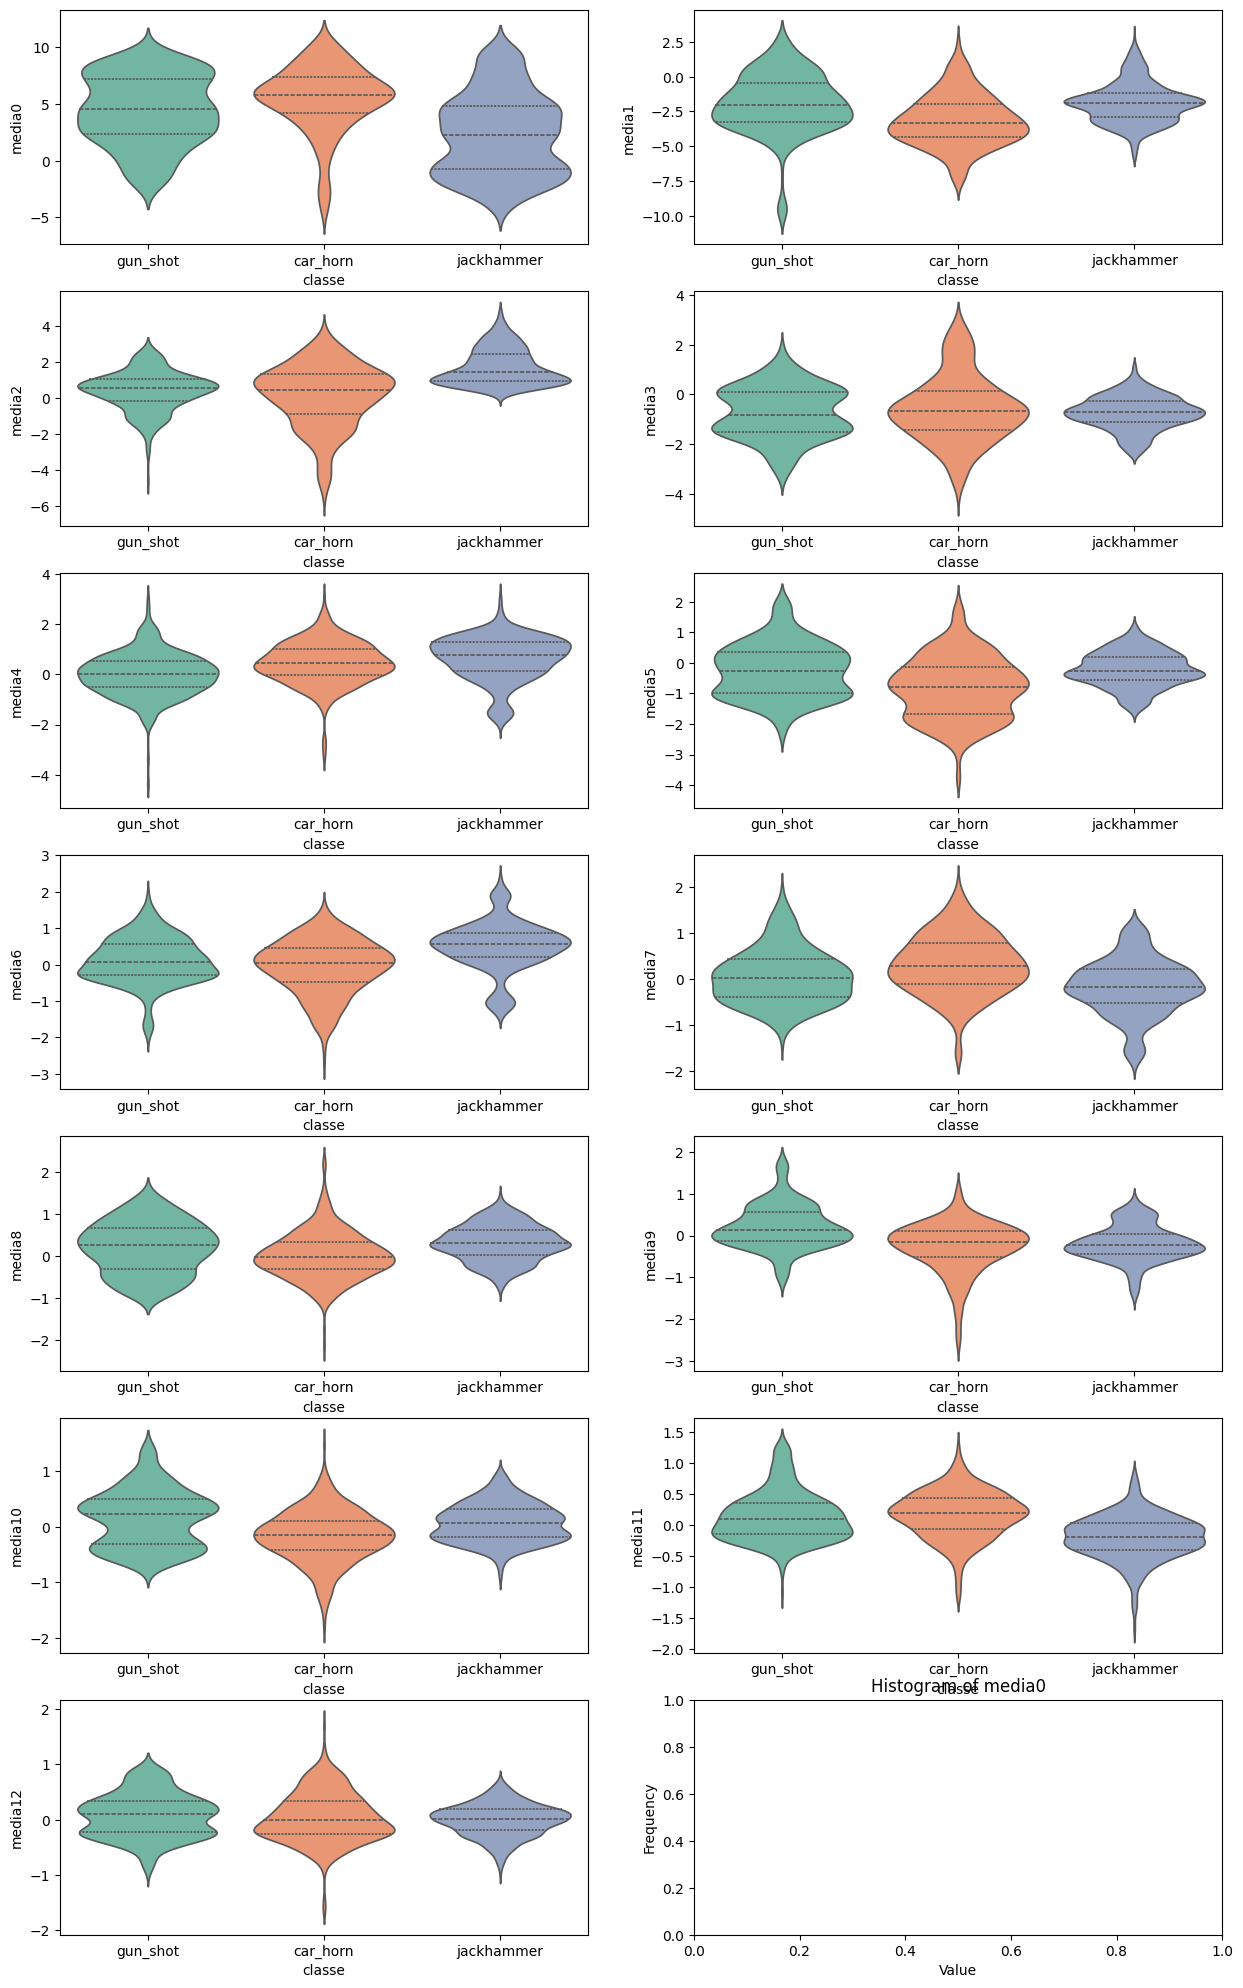

In [69]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.violinplot(data=df, x='classe', y='media' + str(i*2), inner='quart', palette='Set2', ax=axes[i][0])
    if (i == 6):
        continue
    sns.violinplot(data=df,x='classe', y='media' + str(i*2 + 1), inner='quart', palette='Set2', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

## Bivariate Analysis (Correlation between features and the different target variables)
**In the bivariate analysis, we need to understand the relationship between the individual features and the target variable: class of the sound.**

Here, we will plot the relationship between each mean and standard deviation. We will differentiate each of the 3 classes with a different style and see how the values differ for each of the class.
The idea is to find some mean-std pairs where we can see the difference between the classes.

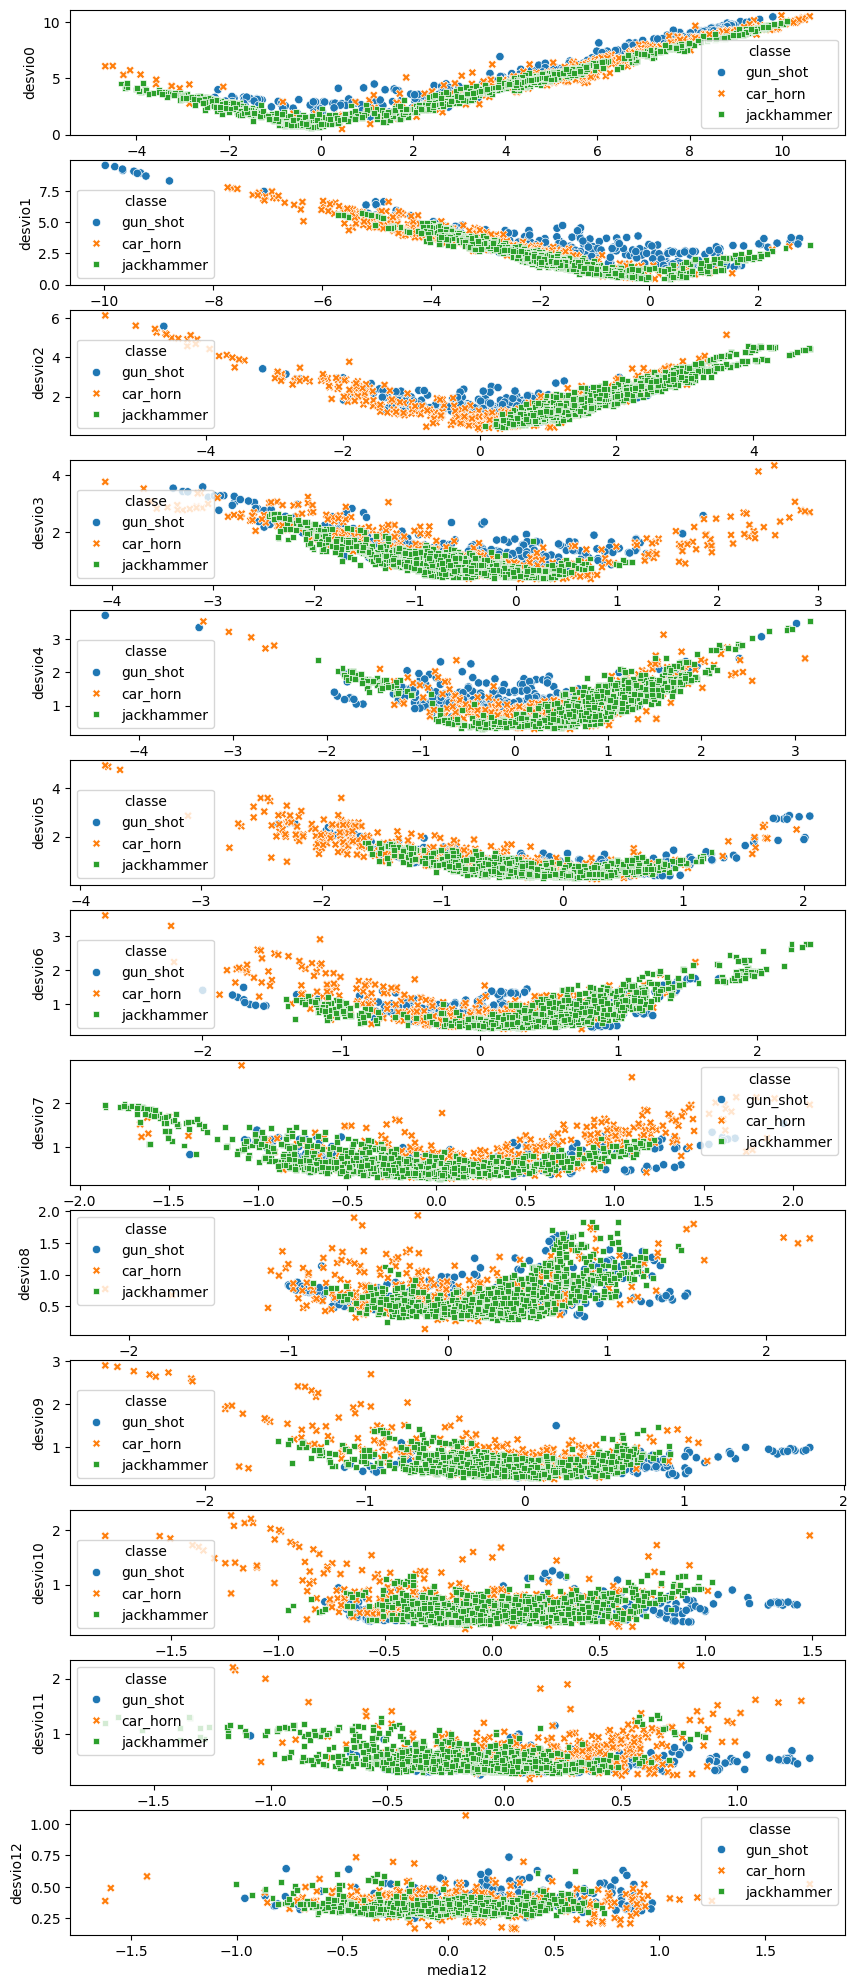

In [32]:
f, axes = plt.subplots(13, 1, figsize=(10,25))

for i in range(0,13):
    j = str(i)
    sns.scatterplot(data=df, x='media' + j, y='desvio' + j, ax=axes[i], hue='classe', style='classe')
plt.show()

From the graph, we see that some pairs have values very simillar for all the classes (e.g. the 1th or the 13th one), while in some we can see differences (namely 3rd one).
We can use this information to select (or maybe discard) the features that hold no information about the differences between each class.

<Axes: >

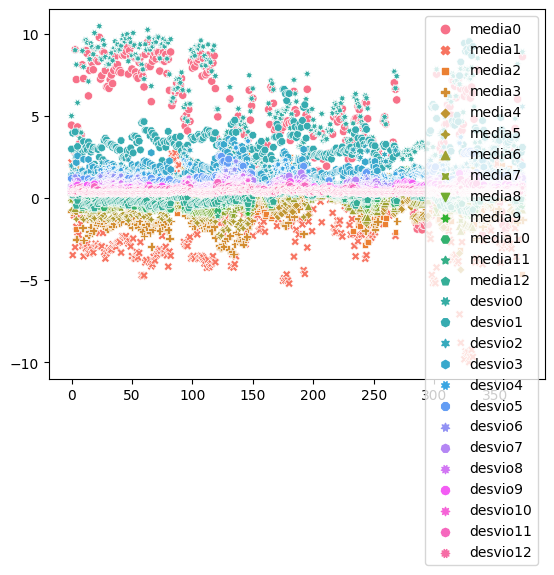

In [9]:
sns.scatterplot(data=df_gun_shot)

<Axes: >

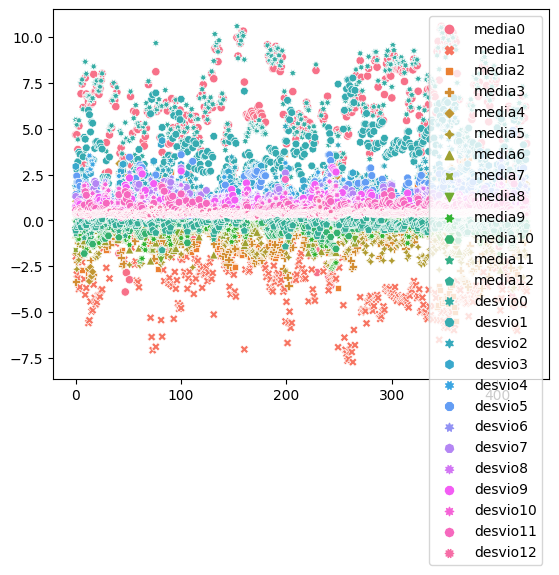

In [10]:
sns.scatterplot(data=df_car_horn)

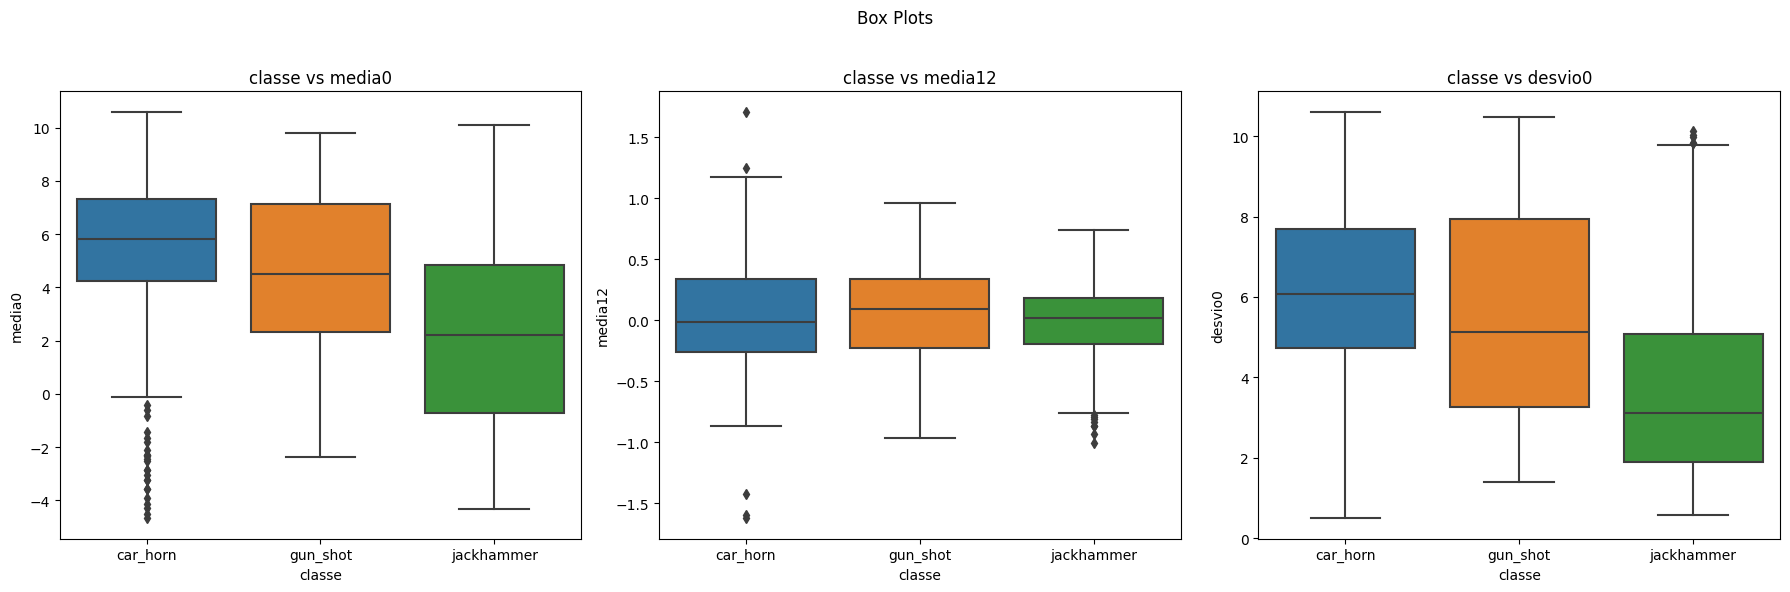

In [12]:
df = pd.read_csv('all.csv')

# Plot box plots for categorical variables vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots')

sns.boxplot(x='classe', y='media0', data=df, ax=axes[0])
axes[0].set_title('classe vs media0')

sns.boxplot(x='classe', y='media12', data=df, ax=axes[1])
axes[1].set_title('classe vs media12')

sns.boxplot(x='classe', y='desvio0', data=df, ax=axes[2])
axes[2].set_title('classe vs desvio0')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 2. Methods Application
Consider using the following methods: Logistic Regression, Linear Discriminant Analysis (LDA)
and Quadratic Discriminant Analysis (QDA). Applying the methods to the chosen data, try to
decide which method is most appropriate for the problem, giving reasons for your choice. Use the
following resampling methods for the various suggested models: <br>
• Holdout<br>
• Cross Validation (with k = 5 and k = 10)<br>
• Leave One Out Cross Validation (LOOCV)<br>
• Bootstrap<br>
Use the evaluation metrics that you find most appropriate to evaluate the results obtained
in each experiment. Analyzing the results obtained, indicate how the variance is affected by the
resampling methods used.

Before applying the evaluation method and metrics, we will split the dataset into features and target values, which will then utilized afterwards.

In [62]:
X = df.drop(['classe'], axis=1)
y = df['classe']
# y_encoded = pd.get_dummies(y, dtype=int) # I don't know if this will be useful later, I am just saving this here for the time beign.

### Holdout

For understanding the classification report and confusion matrix:  
*Precision* = $TP / (TP + FP)$  
*Recall* = $TP / (TP + FN)$  
*F1-Score* = $2 * (Precision * Recall) / (Precision + Recall)$  
*Accuracy* = $(TP + TN) / (TP + TN + FP + FN)$  
*Average vs Weighted Average* = Weighted average also considers the number of instaces for each class in the dataset

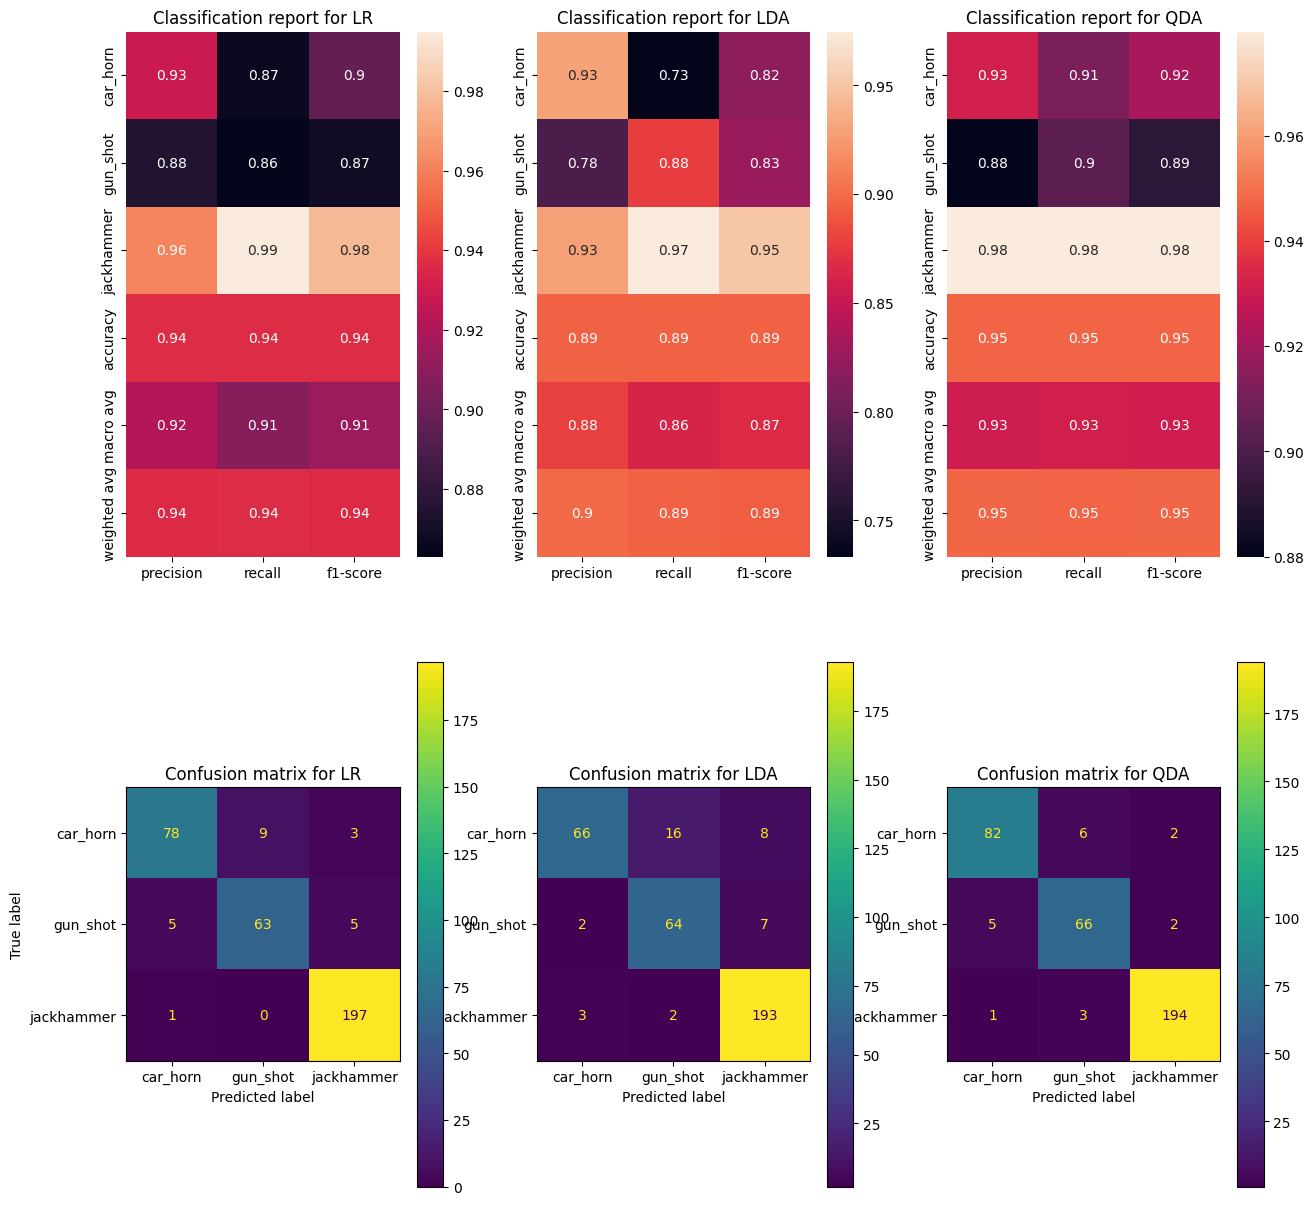

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# What about the color graphs? (the classifier boundary)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {'LR':LogisticRegression(), 'LDA': LDA(), 'QDA': QDA()}


f, axes = plt.subplots(2, 3, figsize=(15, 15))

for idx, (name, model) in enumerate(models.items()):
    col = idx

    # Training the model
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Creating the metrics
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    clf_report = classification_report(y_test, y_pred, output_dict=True)

    # Plotting the metrics
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=axes[0][col])
    axes[0][col].set_title(f'Classification report for {name}')
    
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot(ax=axes[1][col]);
    axes[1][col].set_title(f'Confusion matrix for {name}')


Looking at the results, we see that LDA performed the worst, as it did mistake gunshot with carhorn a lot of the times, decreasing the recall for car_horn and precision for gun_shot quite substantially.
The performace of LR and QDA are quite comparable, altough QDA performed a bit better.  
Based on this test, __QDA__ is the best choice.

### Cross Validation
We will use the cross validation to evaluate each model's performance.

In [112]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


print('Cross validation with cv=5')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nCross validation with cv=10')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nLeave One Out Cross validation (cv=1803)')
for name,model in models.items():
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo)
    print(f'Result for {name}: Mean = {scores.mean()}, std = {scores.std()}')

Cross validation with cv=5
Results for LR: Mean = 0.8079763004001231, std = 0.11918640794336664
Results for LDA: Mean = 0.753080947983995, std = 0.1235355638590949
Results for QDA: Mean = 0.7064773776546629, std = 0.09113028635975673

Cross validation with cv=10
Results for LR: Mean = 0.8585758133824433, std = 0.08891858048648217
Results for LDA: Mean = 0.8108624923265808, std = 0.10558605601399941
Results for QDA: Mean = 0.7902516881522407, std = 0.11069834897240295

Leave One Out Cross validation (cv=1803)
Result for LR: Mean = 0.9406544647809207, std = 0.23627027461921726
Result for LDA: Mean = 0.8901830282861897, std = 0.31266148537582705
Result for QDA: Mean = 0.9489739323349973, std = 0.22005092156964334


Based on the results from cross validation with $k=5$ and $k=10$, it would seem that __Logistic regression__ is the best choice.  
But assesing the model's performance with _LOOCV_, __QDA__ looks like the best choice, which is in agreement with the Holdout method.

### Bootstrap

In [128]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np


num_samples = 1000

bootstrap_scores = {
    'LR': [],
    'LDA': [],
    'QDA': []
}

for name, model in models.items():
    for _ in range(num_samples):
        X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=np.random.randint(1, 1000))
        
        model.fit(X_bootstrap, y_bootstrap)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        bootstrap_scores[name].append(accuracy)

In [127]:
for name, scores in bootstrap_scores.items():
    print(f'{name} mean = {np.mean(scores)}')

LR mean = 0.9338698060941829
LDA mean = 0.8935401662049862
QDA mean = 0.9431911357340721


From the _Bootstrap_ resampling technique, we once again see that __QDA__ is the best choice for our data.

## Multiple Linear Regression
https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('all.csv')

In [62]:
# car horn = 0, gunshot =1, jackhammer = 2
df['classe'].mask(df['classe'] == 'car_horn', 0, inplace=True)
df['classe'].mask(df['classe'] == 'gun_shot', 1, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 2, inplace=True)

In [63]:
df.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,4.677986,-1.966398,1.688301,-3.354441,1.043490,-1.798730,-0.767414,-1.614851,-0.185658,-0.029143,...,1.890468,1.410196,0.803002,1.311613,0.601646,0.769883,0.416295,0.564592,0.349746,0
1,4.677564,-2.953498,1.426739,-2.261733,0.930528,-2.665626,-0.332971,-0.714048,0.139587,-0.898208,...,1.472251,2.427163,0.554742,0.577265,0.766374,0.758806,0.532139,0.454760,0.376218,0
2,3.872289,-3.173699,1.931834,-1.202015,0.610031,-2.204595,-0.295343,-0.319409,-0.161939,-1.040936,...,1.159666,2.092606,0.540943,0.634752,0.439129,1.018796,0.385876,0.508423,0.394474,0
3,5.160424,-3.750595,2.151555,-1.886166,1.334776,-2.151562,-0.546990,-0.359816,0.054898,-1.013008,...,1.627613,2.086991,0.654731,0.591023,0.497059,0.950790,0.567042,0.393286,0.332839,0
4,2.252624,-3.644894,1.939464,-1.974539,1.823046,-1.844794,-1.132419,-0.942162,0.582952,-0.769522,...,2.167108,1.868980,1.226150,1.161215,1.018720,0.892772,0.453530,0.655595,0.546549,0


In [64]:
df.describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,...,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,3.495076,-2.184187,1.073255,-0.698825,0.455421,-0.364949,0.287642,0.002218,0.228245,-0.124225,...,1.210243,1.095423,0.908105,0.852591,0.728579,0.674253,0.647240,0.578561,0.553523,0.356440
std,3.605594,1.792660,1.425874,0.954231,0.904173,0.801812,0.731956,0.645442,0.515347,0.523789,...,0.628151,0.552409,0.544199,0.438909,0.346493,0.289774,0.300969,0.251892,0.239224,0.066549
min,-4.672307,-9.984891,-5.472591,-4.068377,-4.362307,-3.794095,-2.701501,-1.856276,-2.150302,-2.626062,...,0.334159,0.295266,0.265892,0.280354,0.280959,0.136682,0.267503,0.190234,0.176745,0.163466
25%,0.401549,-3.338016,0.517790,-1.269979,-0.105763,-0.866011,-0.110261,-0.397775,-0.132682,-0.408994,...,0.745493,0.625401,0.545898,0.536299,0.489104,0.460650,0.462194,0.412720,0.388282,0.315536
50%,3.897727,-2.127124,1.070444,-0.717425,0.528501,-0.334075,0.367085,-0.010347,0.248138,-0.135857,...,1.072896,1.024874,0.753169,0.738506,0.622663,0.590892,0.570859,0.515397,0.484400,0.343735
75%,6.220131,-1.201787,1.952195,-0.131011,1.133396,0.188993,0.767006,0.394905,0.589735,0.170755,...,1.517922,1.464322,1.073476,1.030323,0.855334,0.806172,0.745861,0.666146,0.635796,0.380651
max,10.602967,2.943808,4.826087,2.914812,3.156123,2.050018,2.381640,2.096199,2.274243,1.788323,...,4.357339,3.719680,4.920654,3.605649,2.860202,1.935464,2.905896,2.263505,2.240934,1.069302


### For means

In [66]:
x = df[['media0','media1', 'media2', 'media3', 'media4', 'media5','media6', 'media7', 'media8', 'media9', 'media10', 'media11', 'media12']]
y = df['classe']

In [67]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [68]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [69]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  1.4693002251458214
Coefficients:


[('media0', -0.03304629463692754),
 ('media1', 0.08542237987384954),
 ('media2', 0.248404412698254),
 ('media3', -0.016562194186804616),
 ('media4', -0.31801938503528643),
 ('media5', 0.25532635875788023),
 ('media6', 0.2822388882060078),
 ('media7', -0.21768123323201427),
 ('media8', 0.011165948818524375),
 ('media9', -0.054637811694603994),
 ('media10', 0.2115549379095932),
 ('media11', -0.5996463923947668),
 ('media12', -0.0652032839746377)]

Regression Equation: Classe =  1.4693 + (-0.0330 * media0) + (0.0854 * media1) + (0.2484 * media2) + (and so on...) + e

In [70]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 0.30545303  2.01450628  1.57752736  0.32335249  1.87493489  1.01094457
  1.35506924  1.61175013  1.50641799 -0.06785388  2.18647524  2.1627917
  1.51160612  1.94883825  0.37285524  0.50699946  1.52797199  0.53476727
  1.60925356  0.78761156  1.21453524  1.3647166   2.57774816  1.32236215
  0.41670426  2.07736747  1.99358415  1.46408988  1.91388879 -0.3009476
  1.26737006  1.37884007 -0.20637774 -0.80815743  1.5866618   2.2273639
  1.76804291 -0.67341809 -0.22098051  1.77865133  2.19525868  2.38606396
  0.19570415  1.73798918  1.08516729  1.90027499  1.96888043  1.37064363
  1.8359154   1.94159959  1.84851196  1.32810361  0.20012389  1.15736958
  1.57369674  1.9231152   0.9749981   1.60285398  1.72229412  1.64887804
  0.8152193   2.05295786  2.20641092  1.01297066  2.1915315   0.66484316
  1.7272781   0.73776341 -0.75427277  1.18061911  1.15087695  0.84976339
  0.80951923  1.22244396  0.21815605  1.55811442  1.3175717   1.04806818
 -0.86465723  1.46328675  0.8

In [73]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(10)

,Actual value,Predicted value
134,0,0.305453
1390,2,2.014506
845,2,1.577527
31,0,0.323352
953,2,1.874935
996,2,1.010945
533,1,1.355069
1109,2,1.611750
57,0,1.506418
176,0,-0.067854


In [80]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 61.52
Mean Absolute Error: 0.3982217462597216
Mean Square Error: 0.253586120590444
Root Mean Square Error: 0.503573351747731


## 3. Feature Selection
Can classification models obtain better results if they use just a few features instead of all available
features? Evaluate this hypothesis, using regularization methods.

## 4. Learning a non-linear function
Use Generalized Additive Models (GAMs) to perform binary classification of your dataset. To do
this, you must try to build a model that allows you, among the three classes under analysis, to
identify one of them. You should test the three hypotheses and present only the one with the best
results. To validate the performance of the models, use cross-validation. Evaluate the results using
the evaluation metrics that you consider appropriate.